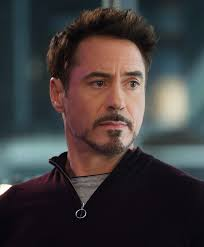

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Read the image
image = cv2.imread("image.jpeg")
# 2.original image
cv2_imshow( image)

In [2]:
# 3. Extract image size (height, width, channels)
height, width, channels = image.shape
print(f"Image Dimensions: Width = {width}, Height = {height}, Channels = {channels}")

Image Dimensions: Width = 204, Height = 247, Channels = 3


In [3]:
# 4. Calculate total number of pixels
total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")

Total Number of Pixels: 50388


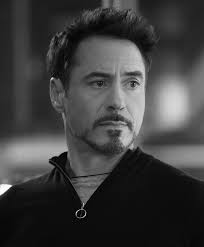

True

In [4]:
# 5. Convert BGR to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow( gray_image)
cv2.imwrite("grayscale_image.jpg", gray_image)

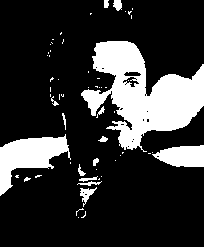

Black Pixel Count: 40145


In [5]:
# 6. Convert Grayscale to Binary Image using a threshold
threshold_value = 100
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2_imshow( binary_image)
cv2.imwrite("binary_image.jpg", binary_image)


# Count the number of black pixels in the binary image
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")

In [6]:
# Wait for a key press and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()

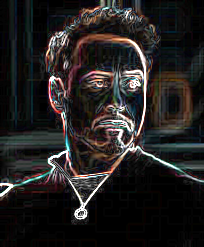

In [7]:
#Task 2
 #---------------- EDGE DETECTION ---------------- #
# 1. Sobel Operator (detects horizontal and vertical edges)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
cv2_imshow( sobel_combined)

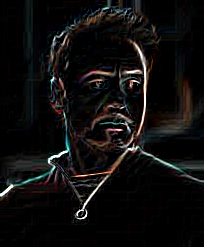

In [8]:
# 2. Prewitt Operator (alternative to Sobel, without smoothing)
kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(image, -1, kernel_x)
prewitt_y = cv2.filter2D(image, -1, kernel_y)
prewitt_combined = cv2.magnitude(prewitt_x.astype(np.float64), prewitt_y.astype(np.float64))
cv2_imshow( prewitt_combined)

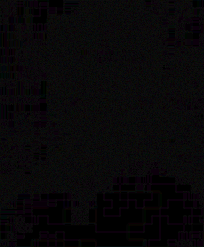

In [9]:
from scipy import ndimage
# 3. Roberts Cross Operator (highlights diagonal edges)
roberts_x = ndimage.sobel(image, axis=0, mode="constant")
roberts_y = ndimage.sobel(image, axis=1, mode="constant")
roberts_combined = np.sqrt(roberts_x**2 + roberts_y**2)
cv2_imshow(roberts_combined)

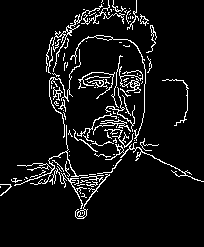

In [10]:
# 4. Canny Edge Detector (best for detecting fine edges)
canny_edges = cv2.Canny(image, 50, 150)
cv2_imshow(canny_edges)

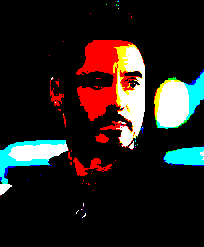

In [11]:
# ---------------- IMAGE SEGMENTATION ---------------- #
# 1. Global Thresholding
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(global_thresh)

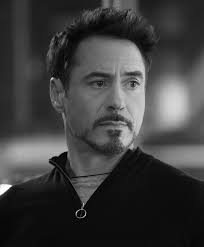

In [13]:
import cv2
import numpy as np

# Load the image (use an absolute path if needed)
image = cv2.imread("image.jpeg", cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    raise ValueError("Error: Image not found! Please check the file path.")

# Convert grayscale to BGR (for watershed algorithm)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Display the image
cv2_imshow( image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

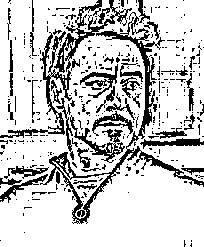

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use this for displaying images in Google Colab

# Load the grayscale image
image = cv2.imread("image.jpeg", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Error: Image not found! Please check the file path.")

# Apply Adaptive Thresholding (use 'image' directly since it's already grayscale)
adaptive_thresh = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Display the result
cv2_imshow(adaptive_thresh)  # Use cv2.imshow() instead if running locally
cv2.waitKey(0)
cv2.destroyAllWindows()

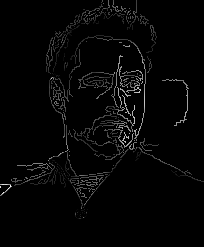

In [16]:
# 3. Edge Detection for Segmentation (Using Canny)
segmentation_canny = cv2.bitwise_and(image, image, mask=canny_edges)
cv2_imshow(segmentation_canny)

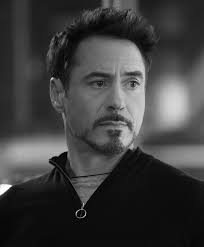

In [18]:
import cv2
import numpy as np

# Load the image (use an absolute path if needed)
image = cv2.imread("image.jpeg", cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    raise ValueError("Error: Image not found! Please check the file path.")

# Convert grayscale to BGR (for watershed algorithm)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Display the image
cv2_imshow( image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


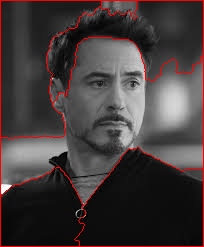

In [19]:
 #4. Region-Based Segmentation (Watershed Algorithm)
# Convert grayscale to BGR (needed for watershed)
image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Create marker using Otsu's thresholding
_, markers = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform distance transform and normalize
dist_transform = cv2.distanceTransform(markers, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

# Find sure background region
sure_bg = cv2.dilate(markers, np.ones((3,3), np.uint8), iterations=3)

# Unknown region (Subtract foreground from background)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labeling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]  # Mark boundary in red
cv2_imshow( image_color)

# Wait and close
cv2.waitKey(0)
cv2.destroyAllWindows()